# Task 1 : Predicting House Prices

In [1]:
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
traindf = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
testdf = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
traindf.shape

(1460, 81)

In [5]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
import pandas as pd

columns_to_drop = []

def drop_columns_by_null_percentage(df, threshold_percentage):
    threshold_count = len(df) * (threshold_percentage / 100)    
    null_counts = df.isnull().sum()    
    columns_to_drop = null_counts[null_counts > threshold_count].index.tolist()
    print(columns_to_drop)
    df_dropped = df.drop(columns=columns_to_drop)
    return columns_to_drop, df_dropped

threshold_percentage = float(input("Enter the threshold percentage: "))
columns_to_drop, traindf = drop_columns_by_null_percentage(traindf, threshold_percentage)
testdf.drop(columns = columns_to_drop, inplace=True)
traindf.shape, testdf.shape

Enter the threshold percentage:  10


['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


((1460, 75), (1459, 74))

In [7]:
print(traindf.isnull().sum().sum())

609


In [8]:
traindf.dropna(inplace=True)

In [9]:
traindf.shape

(1338, 75)

In [10]:
print(traindf.isnull().sum().sum())

0


In [11]:
traindf.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# Explore numerical columns
df = traindf
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
if len(numerical_cols) > 0:
    print("\nNumerical Column Statistics:")
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"Minimum: {df[col].min()}")
        print(f"Maximum: {df[col].max()}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}")


Numerical Column Statistics:

Id:
Minimum: 1
Maximum: 1460
Mean: 731.2286995515695
Median: 730.5
Standard Deviation: 421.7796909729421

MSSubClass:
Minimum: 20
Maximum: 190
Mean: 56.13602391629298
Median: 50.0
Standard Deviation: 41.2525762994777

LotArea:
Minimum: 1300
Maximum: 215245
Mean: 10706.29446935725
Median: 9600.0
Standard Deviation: 10336.62112641886

OverallQual:
Minimum: 2
Maximum: 10
Mean: 6.219730941704036
Median: 6.0
Standard Deviation: 1.3244716712833733

OverallCond:
Minimum: 2
Maximum: 9
Mean: 5.596412556053812
Median: 5.0
Standard Deviation: 1.0781236575616269

YearBuilt:
Minimum: 1880
Maximum: 2010
Mean: 1973.0291479820628
Median: 1976.0
Standard Deviation: 29.563539867131393

YearRemodAdd:
Minimum: 1950
Maximum: 2010
Mean: 1985.668908819133
Median: 1994.5
Standard Deviation: 20.29646255819281

MasVnrArea:
Minimum: 0.0
Maximum: 1600.0
Mean: 110.36023916292974
Median: 0.0
Standard Deviation: 185.6048157176807

BsmtFinSF1:
Minimum: 0
Maximum: 5644
Mean: 464.23467862

In [13]:
# Explore unique values in categorical columns

df = traindf
categorical_cols = df.select_dtypes(include=["object"]).columns
if len(categorical_cols) > 0:
    print("\nUnique Values in Categorical Columns:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].unique())


Unique Values in Categorical Columns:

MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']

Street:
['Pave' 'Grvl']

LotShape:
['Reg' 'IR1' 'IR2' 'IR3']

LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']

Utilities:
['AllPub' 'NoSeWa']

LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope:
['Gtl' 'Mod' 'Sev']

Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType:
['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']

HouseStyle:
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle:
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl:
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'C

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    traindf[col] = label_encoder.fit_transform(traindf[col].astype(str))
    testdf[col] = label_encoder.fit_transform(testdf[col].astype(str))
    

# Machine Learning Modelling

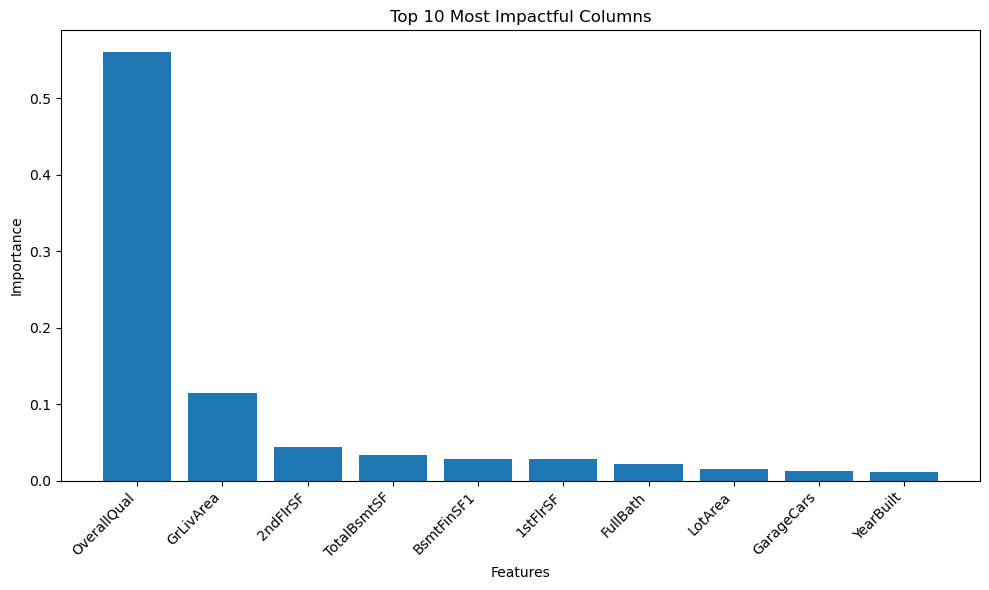

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor  

X = traindf.drop(columns=['SalePrice'])
y = traindf['SalePrice']

rf_model = RandomForestRegressor() 
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_impactful_columns = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_impactful_columns['Feature'], top_impactful_columns['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Most Impactful Columns')
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Selecting the relevant columns for modeling
X = traindf[top_impactful_columns['Feature']]
y = traindf['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(),
    MLPRegressor(),
]

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
    }

    with open(f'{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Results

In [17]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.round(3)
results_df

,MSE,MAE,RMSE,R2
LinearRegression,9.081346e+08,22734.120,30135.272,0.788
DecisionTreeRegressor,1.127686e+09,23276.601,33581.038,0.736
RandomForestRegressor,7.184169e+08,17922.840,26803.300,0.832
GradientBoostingRegressor,6.818824e+08,17418.758,26112.878,0.841
KNeighborsRegressor,1.998911e+09,31753.771,44709.185,0.533
SVR,4.353893e+09,48642.106,65984.039,-0.017
MLPRegressor,1.953739e+09,32583.216,44201.125,0.543


Based on these metrics, the model that performed the best is the **Gradient Boosting Regressor**. It has the **lowest values for MSE, MAE, and RMSE, and the highest R2 value** among the models listed. The Gradient Boosting Regressor achieved an R2 value of approximately **0.841**, indicating a strong fit to the data and better predictive performance compared to the other models.

# Lets now predict the SalePrice for the testdf

In [18]:
testdf.dropna(inplace=True)

In [19]:
import pandas as pd
import pickle

with open('GradientBoostingRegressor_model.pkl', 'rb') as f:
    model = pickle.load(f)

X_test = testdf[top_impactful_columns['Feature']]
predictions = model.predict(X_test)
testdf['Predicted_SalePrice'] = predictions

In [20]:
testdf.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_SalePrice
0,1461,20,2,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,6,2010,8,4,130697.009752
1,1462,20,3,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4,173342.103644
2,1463,60,3,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,3,2010,8,4,176952.766690
3,1464,60,3,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,6,2010,8,4,181673.339983
4,1465,120,3,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,1,2010,8,4,207065.315662
